In [ ]:
!python --version

import pandas as pd
import sklearn
import graphviz
import matplotlib as matplotlib

print("pandas", pd.__version__)
print("sklearn", sklearn.__version__)
print("graphviz", graphviz.__version__)
print("matplotlib", matplotlib.__version__)

Python 3.7.13
pandas 1.3.5
sklearn 1.0.2
graphviz 0.10.1
matplotlib 3.2.2


In [ ]:
import pandas as pd
# https://zhuanlan.zhihu.com/p/340441922
data = pd.read_csv("data.txt",delim_whitespace=True)
data

,google星數,價格,距離,推不推薦
0,4.5,1,0.1,True
1,2.0,1,0.1,False
2,3.5,1,0.1,True
3,4.5,3,1.0,True
4,3.5,3,1.0,False
5,1.0,1,0.1,False
6,2.0,1,0.1,False
7,3.0,1,0.1,False
8,5.0,1,0.1,True
9,5.0,3,1.0,True


[Text(0.4, 0.875, 'X[0] <= 3.25\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.625, 'X[0] <= 4.0\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.4, 0.375, 'X[2] <= 0.55\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

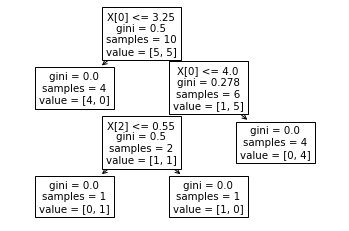

In [ ]:
from sklearn import tree

features = list(data.columns[:3])
X = data[features]
y = data["推不推薦"]

classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X, y)
tree.plot_tree(classifier)

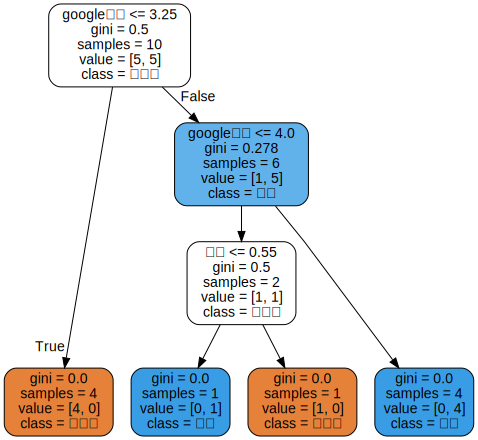

In [ ]:
import graphviz

dot_data = tree.export_graphviz(classifier, out_file=None,
                     feature_names=features,
                     class_names=["不推薦", "推薦"],
                     filled=True, rounded=True, leaves_parallel=True)

graph = graphviz.Source(dot_data)
graph
# 每個節點的最上面就是判斷的條件

In [ ]:
d = {'feature': features, 'importance': classifier.feature_importances_}
pd.DataFrame(data=d).sort_values(by=['importance'], ascending=False)

,feature,importance
0,google星數,0.8
2,距離,0.2
1,價格,0.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26143 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26684 missing from current font.
  font.set_text

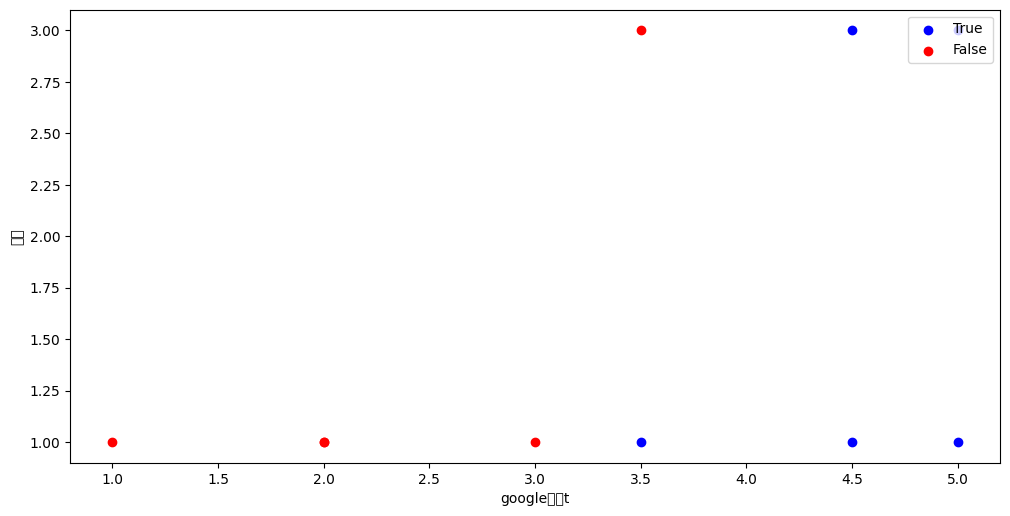

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 6), dpi=100, facecolor='w', edgecolor='k')

can = data[data["推不推薦"] == True]
canNot = data[data["推不推薦"] == False]

ax = plt.subplot()

ax.scatter(can["google星數"], can["價格"], c='b', label='True')
ax.scatter(canNot["google星數"], canNot["價格"], c='r', label='False')

ax.set_xlabel('google星數t')
ax.set_ylabel('價格')
plt.legend(loc='upper right')

plt.draw()